# IoT Applications Predictive Maintenance of Turbo Engines


## References

* https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
* https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb
* https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
* https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-f-value
* https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
* https://www.kdnuggets.com/2016/08/learning-from-imbalanced-classes.html/2
* https://mlwhiz.com/blog/2020/01/28/imbal/
* ADASYN: Adaptive synthetic sampling approach for imbalanced learning, https://ieeexplore.ieee.org/document/4633969
* https://www.youtube.com/watch?v=m7KWxX23zCU

# Turbo Engine Data Description

The engine under study is a turbofan engine (a jet engine). A turbofan engine has many components. A few important components are: Fan, Low Pressure Compressor (LPC), High Pressure Compressor (HPC), Low Pressure Turbine (LPT), High Pressure Turbine (HPT).

In [2]:
!pip install pandas
!pip install numpy
!pip install imblearn

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import zscore
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, f1_score, \
    roc_auc_score
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np
import seaborn as sn
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean
from imblearn.under_sampling import TomekLinks 
from imblearn.combine import SMOTETomek 
import time
from sklearn.ensemble import RandomForestClassifier

## Load Data
This data was provided to us.\
It was retrieved from NASA at https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/#turbofan \
It was edited in order to help our project.

* Reading the edited files of train and test data.

In [35]:
train = pd.read_csv(r'dataTopicF/train_FD001.csv', sep=';')
train

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,Failure_status
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,no
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,no
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,no
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,no
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,yes
20627,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,yes
20628,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,yes
20629,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,yes


Now we load the full dataset provided

In [36]:
test = pd.read_csv(r'dataTopicF\test_FD001.csv', sep=';')
test

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,Failure_status
0,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,no
1,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,no
2,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,no
3,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,no
4,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,yes
13092,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,yes
13093,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,yes
13094,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,yes


As we can see, this dataset has 13096 entries, however we're only gonna predict the failure status label for the last running cycle of each machine.

For this, we need to use the original dataset which included the engine unit id and the time in cycles.

In [37]:
original_test = pd.read_csv('dataTopicF/test_FD001_original.txt', sep='\s+')
original_test.columns = ['unit_id', 'time'] + list(test.columns)[:-1]
original_test

,unit_id,time,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
1,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
2,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
3,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
4,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13091,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13092,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13093,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


Now, we have to find the last cycle of each one of the 100 engine units.

In [38]:
test_df = pd.DataFrame(columns=list(original_test.columns)) 

for i in range(1,101):
    x = original_test.loc[original_test['unit_id'] == i]
    last_cycle = max(x['time'])
    to_test = original_test.loc[original_test['unit_id'] == i].loc[original_test['time'] == last_cycle]
    test_df = test_df.append(to_test, ignore_index=True)
    
test_df

,unit_id,time,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,521.88,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,521.00,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,-0.0006,0.0003,100.0,518.67,642.30,1590.88,1397.94,14.62,...,522.30,2388.01,8148.24,8.4110,0.03,391,2388,100.0,38.96,23.4606
96,97,134,0.0013,-0.0001,100.0,518.67,642.59,1582.96,1410.92,14.62,...,521.58,2388.06,8155.48,8.4500,0.03,395,2388,100.0,38.61,23.2953
97,98,121,0.0017,0.0001,100.0,518.67,642.68,1599.51,1415.47,14.62,...,521.53,2388.09,8146.39,8.4235,0.03,394,2388,100.0,38.76,23.3608
98,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,...,521.82,2388.02,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595


#### Filtering from the original dataset

Now, we match the entries of the original dataset and the dataset with the failure status label, in order to produce a dataframe which only contains information about the last cycle of each one of the 100 engines.

This dataframe will be used in the testing phase to predict the failure status of each engine.

In [39]:
test_df = test_df[[x for x in test_df.columns[2:]]] #Remove first 2 cols
test = pd.merge(test_df, test, how ='inner', on =list(test_df.columns))

test

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,Failure_status
0,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,21.61,554.42,...,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,no
1,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,21.61,553.52,...,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,no
2,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,21.61,552.59,...,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,no
3,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,21.61,552.64,...,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581,no
4,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,21.61,553.29,...,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.0006,0.0003,100.0,518.67,642.30,1590.88,1397.94,14.62,21.61,553.99,...,2388.01,8148.24,8.4110,0.03,391,2388,100.0,38.96,23.4606,no
96,0.0013,-0.0001,100.0,518.67,642.59,1582.96,1410.92,14.62,21.61,554.05,...,2388.06,8155.48,8.4500,0.03,395,2388,100.0,38.61,23.2953,no
97,0.0017,0.0001,100.0,518.67,642.68,1599.51,1415.47,14.62,21.61,553.44,...,2388.09,8146.39,8.4235,0.03,394,2388,100.0,38.76,23.3608,no
98,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,21.61,554.75,...,2388.02,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595,no


# Data Analysis
In order to avoid problems with our classifier, we need to handle the data that was given to us and deal with certain problems tha may arise. As such, we are going to:

* Remove rows with missing values
* Remove duplicate rows
* Check features/types
  

In [40]:
print(f"Features: {list(train.columns)}")
print(f"Entries in train dataset: {train.shape[0]}")
print(f"Missing Values in train dataset: {train.isna().sum().sum()}")
print(f"Duplicate rows in train dataset: {train[train.duplicated(keep=False)].shape[0]}")
print()
print(f"Entries in test dataset: {test.shape[0]}")
print(f"Missing Values in test dataset: {test.isna().sum().sum()}")
print(f"Duplicate rows in test dataset: {test[test.duplicated(keep=False)].shape[0]}")

Features: ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'Failure_status']
Entries in train dataset: 20631
Missing Values in train dataset: 0
Duplicate rows in train dataset: 0

Entries in test dataset: 100
Missing Values in test dataset: 0
Duplicate rows in test dataset: 0


As we can see, we have no problem with our datasets considering there are no repeated data and no missing values.

### Class Imbalance

The distribution of Failure Status is important because it speaks to class imbalance within machine learning and data mining applications. 

Class imbalance is a term used to describe when a target class within a data set is outnumbered by another target class (or classes). 

This can create misleading accuracy metrics, known as an accuracy paradox. To make sure our target classes aren't imbalanced, we will check the total number of samples for each class.

In [41]:
print(f"Train dataset: Failure Status\n {train.iloc[:, train.shape[1]-1].value_counts()}")

Train dataset: Failure Status
 no     17531
yes     3100
Name: Failure_status, dtype: int64


In [42]:
print(f"Test dataset: Failure Status\n {test.iloc[:, test.shape[1]-1].value_counts()}")

Test dataset: Failure Status
 no     75
yes    25
Name: Failure_status, dtype: int64


As we can see, **the data is imbalanced in both datasets**, furthermore we can actually visualize this disparity below.

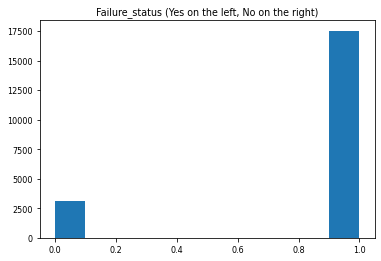

In [43]:
x = train['Failure_status'].map({'yes':0,'no':1})
a=x
plt.hist(a)


plt.title('Failure_status (Yes on the left, No on the right)')
plt.show()

# Pre Processing


### Feature Selection
Some features which have no value to our algorithm can be dropped.

In [44]:
cols = list(train.select_dtypes(include=[float, int]).columns)
#Row with max values for each feature
train_max = train.select_dtypes(include=[float, int]).max()
#Row with min value for each feature
train_min = train.select_dtypes(include=[float, int]).min()
#Row with variance
variance = (train_max - train_min)

#Selecting all features with no variance
dont_use_cols = [x for x in cols if variance[x] == 0]
print(f"Features with no variance: {dont_use_cols}")
cols.append("Failure_status")

# These features provide no useful value to the model, so they are dropped
train = train[[x for x in cols if x not in dont_use_cols]]
test = test[[x for x in cols if x not in dont_use_cols]]


Features with no variance: ['setting3', 's1', 's5', 's10', 's16', 's18', 's19']


Now both the train and test dataset don't contain these no-variance features

### Normalization
Values for each feature are really diverse and need to be normalized, below are all the values for the train dataset for all features (excluding the ones with no variance).

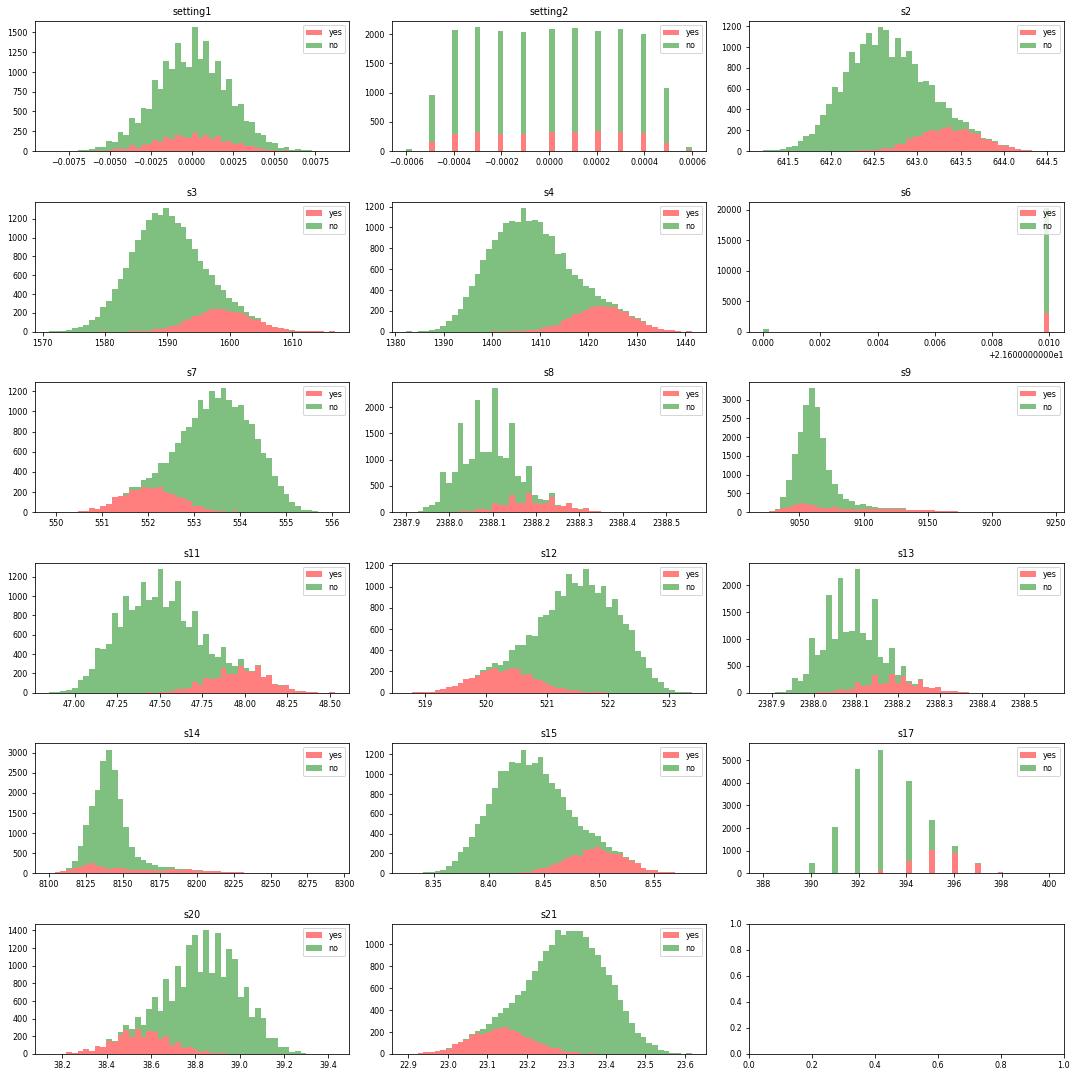

In [45]:
# Joining both datasets to check values
df = pd.concat([train, test])
features_mean = train.select_dtypes(include=[float, int]).columns

# Separating the data 
df_yes=df[df['Failure_status'] =="yes"]
df_no=df[df['Failure_status'] =="no"]

# Creating the window with all subplots.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,15))
axes = axes.ravel()

# Creating histograms with 50 bins
for idx,ax in enumerate(axes):
    if idx<len(features_mean):
        ax.figure
        ax.hist([df_yes[features_mean[idx]],df_no[features_mean[idx]]], bins = 50 ,alpha=0.5, stacked=True, label=['yes','no'],color=['r','g'])
        ax.legend(loc='upper right')
        ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In order to achieve normalization we use **zscore**

$Z = \frac{x - \mu}{\sigma}$

First, we map Failure_status values "yes" and "no" to integer values 0 and 1 respectively

In [46]:
train['Failure_status'] = train['Failure_status'].map({'yes':0,'no':1})
test['Failure_status'] = test['Failure_status'].map({'yes':0,'no':1})

C:\Users\pedro\AppData\Local\Temp/ipykernel_24380/2463166557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Failure_status'] = train['Failure_status'].map({'yes':0,'no':1})
C:\Users\pedro\AppData\Local\Temp/ipykernel_24380/2463166557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Failure_status'] = test['Failure_status'].map({'yes':0,'no':1})


Now we calculate the zscore normalized values for the **train dataset**

In [47]:

X_train = train.iloc[:, :train.shape[1]-1]
Y_train = train.iloc[:, train.shape[1]-1]

cols = X_train.columns

for col in cols:
    X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std(ddof=0)

X_train

,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,-0.315980,-1.372953,-1.721725,-0.134255,-0.925936,0.141683,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427
1,0.872722,-1.031720,-1.061780,0.211528,-0.643726,0.141683,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922
2,-1.961874,1.015677,-0.661813,-0.413166,-0.525953,0.141683,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423
3,0.324090,-0.008022,-0.661813,-1.261314,-0.784831,0.141683,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792
4,-0.864611,-0.690488,-0.621816,-1.251528,-0.301518,0.141683,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.178822,-1.031720,1.618000,1.216258,2.188375,0.141683,-2.189329,1.315066,0.012547,1.980044,-2.607969,2.278282,-0.322542,1.425294,2.446751,-1.805173,-2.921113
20627,-0.727453,-1.714186,1.717992,2.279706,2.738351,0.141683,-2.833345,1.878576,-0.006020,1.867718,-2.350355,1.722087,-0.380207,1.913240,1.155367,-2.856395,-1.203764
20628,0.186933,-0.008022,1.478011,1.946971,2.138377,0.141683,-2.742957,2.019453,0.029755,2.054927,-1.902919,2.000184,-0.141684,3.265092,3.092444,-2.081810,-3.292481
20629,-0.498857,1.015677,1.098043,2.403666,1.955051,0.141683,-3.036719,2.160330,0.383884,3.178182,-2.363913,1.861136,-0.233948,2.579834,1.155367,-2.911722,-2.085072


Now to the **test dataset**

In [48]:
X_test = test.iloc[:, :test.shape[1]-1]
Y_test = test.iloc[:, test.shape[1]-1]

cols = X_test.columns

for col in cols:
    X_test[col] = (X_test[col] - X_test[col].mean())/X_test[col].std(ddof=0)

X_test

,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,-0.225120,1.240071,-0.425894,-1.603619,-1.355943,0.100504,1.451228,-0.607375,-0.333751,-1.427840,0.739155,-0.842309,-0.657866,-1.537896,-0.356332,0.291274,0.994198
1,0.800093,-0.400235,-0.493712,-0.791580,0.032832,0.100504,0.423689,-0.296697,-0.865218,0.292920,0.667113,-0.401310,-0.831042,-0.071375,-1.726838,0.291274,0.021750
2,-0.652292,1.240071,0.252281,-0.313732,0.971886,0.100504,-0.638102,0.635336,-0.660034,1.114192,-0.644059,0.333690,-0.585035,-1.248251,1.014175,1.064567,0.148772
3,0.543790,1.240071,0.026223,0.409090,-0.427375,0.100504,-0.581016,0.169319,-0.566810,0.214704,0.868832,-0.107310,-0.467426,0.321934,1.014175,-1.190872,-0.016773
4,-0.524140,-1.384418,-1.126675,-0.285000,1.026645,0.100504,0.161095,-0.296697,-0.443883,-0.528352,-0.399115,0.480690,-0.893623,-0.507368,0.328921,-0.095373,1.582456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.225120,0.912010,-1.058858,-0.142855,-1.468956,0.100504,0.960293,-1.384069,-0.059106,-1.779813,1.473988,-1.577309,0.320231,-1.275691,-1.726838,1.257891,2.091585
96,0.586507,-0.400235,-0.403288,-1.340501,0.043318,0.100504,1.028795,-0.918053,0.578381,-0.841217,0.436577,-0.842309,0.710822,-0.086619,1.014175,-0.997549,0.370540
97,0.757376,0.255888,-0.199836,1.162154,0.573429,0.100504,0.332352,0.169319,-0.062305,0.253812,0.364535,-0.401310,0.220425,-0.894578,0.328921,-0.030932,1.052503
98,2.038893,-0.072173,-1.737033,-1.027480,-1.464295,0.100504,1.827992,-1.694747,0.157960,-1.310515,0.782381,-1.430309,0.435682,-1.601923,-1.726838,1.193450,1.038968


Now we can see how the feature's value intervals have changed but their distribution has not

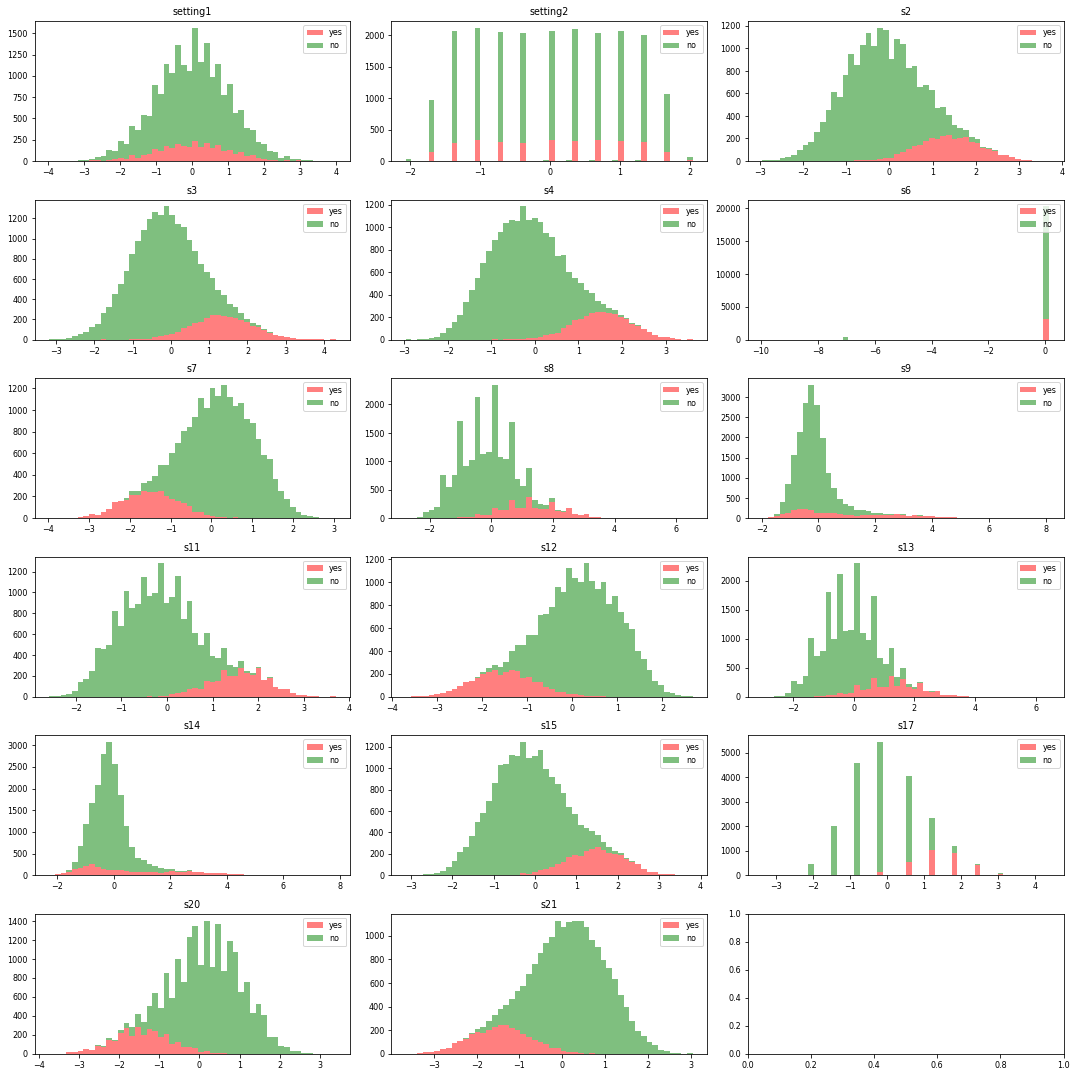

In [49]:
# Joining all datasets to check values
train = X_train.assign(Failure_status = Y_train)
test =  X_test.assign(Failure_status = Y_test)

df = pd.concat([train, test])
features_mean = df.columns[:-1]

# Separating the data 
df_yes=df[df['Failure_status'] ==0]
df_no=df[df['Failure_status'] ==1]

# Creating the window with all subplots.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,15))
axes = axes.ravel()

# Creating histograms with 50 bins
for idx,ax in enumerate(axes):
    if idx<len(features_mean):
        ax.figure
        ax.hist([df_yes[features_mean[idx]],df_no[features_mean[idx]]], bins = 50 ,alpha=0.5, stacked=True, label=['yes','no'],color=['r','g'])
        ax.legend(loc='upper right')
        ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

#### Feature Ranking

We can actually visualize the importance of each feature by using the SelectKBest function.\
    By default, this function utilizes by default the ANOVA F-Score method for feature classification\
More info here: 
https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-f-value

In [51]:
k_bestfeatures = SelectKBest(score_func=f_classif)
rankings = k_bestfeatures.fit(X_train,Y_train)
features_names = reversed(rankings.feature_names_in_)

b = list(rankings.scores_)
a = list(range(0,len(b)))
sf = [g for _,g in sorted(zip(b,a))]
c = 1
sf = reversed(sf)

print('Rank  \t','Index\t\t ANOVA f-score')

inx = []

for chosen in sf:
    print(str(c) + 'º:\t', rankings.feature_names_in_[chosen],'\t\t', b[chosen])
    c += 1

Rank  	 Index		 ANOVA f-score
1º:	 s11 		 16413.344931794476
2º:	 s4 		 14964.686354057492
3º:	 s12 		 14324.885300408052
4º:	 s7 		 13264.886445366566
5º:	 s15 		 12796.099149251731
6º:	 s21 		 12002.45185423512
7º:	 s20 		 11598.502905676201
8º:	 s17 		 10625.481293251145
9º:	 s2 		 10534.073664613947
10º:	 s3 		 9518.132134893915
11º:	 s8 		 8621.677328516585
12º:	 s13 		 8487.760633439253
13º:	 s9 		 4406.586921226188
14º:	 s14 		 2715.5251717918427
15º:	 s6 		 73.48776580634305
16º:	 setting1 		 2.2743512391580785
17º:	 setting2 		 1.823783641342156


### PCA - Principal Component Analysis
* PCA will be used for dimension reduction, which in turn will speed up the algorithms.
* We're reducing the dataset into 2 dimensions.
* The new components are just the two main dimensions of variation.

In [52]:
#Split each dataset into data and target
# Y -> Target (Failure Status), X-> Engine Data
X_train = train.iloc[:, :train.shape[1]-1]
Y_train = train.iloc[:, train.shape[1]-1]

X_test = test.iloc[:, :test.shape[1]-1]
Y_test = test.iloc[:, test.shape[1]-1]

In [53]:
#Apply PCA onto the data datasets
pca = PCA(n_components=2)
X_train = (pca.fit_transform(X_train))
X_test = (pca.fit_transform(X_test))

In [54]:
X_train

array([[-2.95277886, -0.43219582],
       [-2.36366951, -0.78684839],
       [-2.97866496, -0.55245895],
       ...,
       [ 8.00015592, -0.72521896],
       [ 7.74525387, -0.78212316],
       [ 7.84481482, -1.32230731]])

In [55]:
X_test

array([[-3.41259176, -0.75056067],
       [-1.3958401 , -1.12706733],
       [ 0.82166908, -1.16933587],
       [ 0.5205044 , -0.52280446],
       [-0.44193287, -1.07672689],
       [-1.28897176, -0.79219087],
       [-2.70383523,  0.6625359 ],
       [ 0.55236249, -0.93607711],
       [-0.87204804, -0.95848922],
       [-1.2403943 , -0.12326103],
       [ 1.0126447 , -2.42161741],
       [-1.808292  ,  1.43493172],
       [-0.50512716,  0.07309689],
       [-0.05941026, -1.74894171],
       [-3.64481428, -0.72869869],
       [-2.58311778,  0.1191682 ],
       [-0.49833342,  2.71113252],
       [ 1.5220395 , -0.44815292],
       [-1.49895927, -0.16280052],
       [ 4.76898058,  0.28494743],
       [-2.78567268,  1.63910523],
       [-2.47625036, -0.78046858],
       [-3.36143553, -0.6743762 ],
       [ 0.81720776,  5.40351277],
       [-2.05495494, -0.79519139],
       [-3.90751673,  1.03622064],
       [-1.73181328, -1.22319686],
       [-0.75926895, -0.1846057 ],
       [-2.03856892,

Working now with two dimensions, we can call them PCA1 and PCA2, we can visualize how these affect the Failure Status dispersion in the train dataset

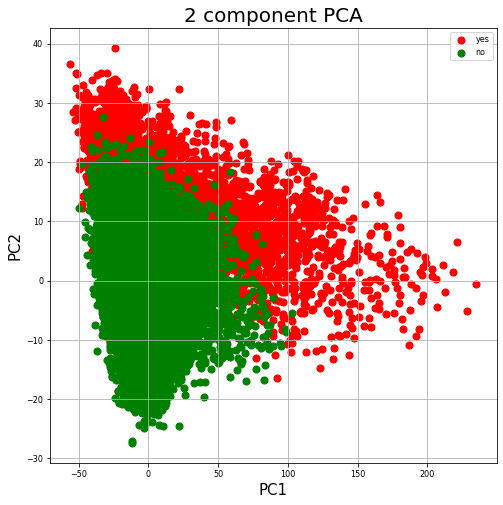

In [21]:
X_train_pca = pd.DataFrame(data = X_train, 
                           columns = ['PC1', 'PC2']) 
finalDf = pd.concat([X_train_pca, Y_train.map({0:"yes",1:"no"})], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["yes", "no"]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Failure_status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
               finalDf.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

We can also do it to the test dataset

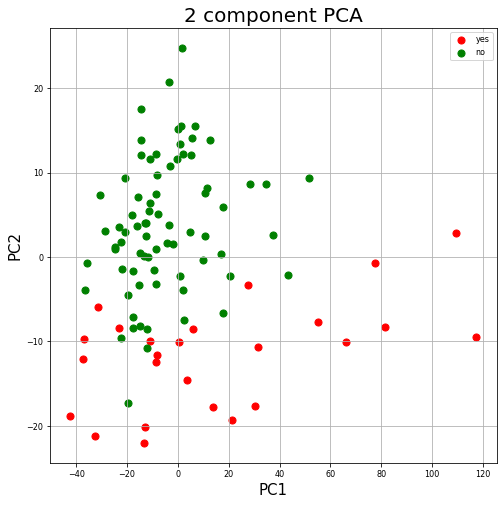

In [22]:
X_test_pca = pd.DataFrame(data = X_test, 
                          columns = ['PC1', 'PC2']) 

finalDf = pd.concat([X_test_pca, Y_test.map({0:"yes",1:"no"})], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['yes', 'no']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Failure_status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
               finalDf.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

## Dealing with Imbalanced Data
As previously mentioned, the data is extremely imbalanced. Considering Failure_status as our target variable, we have seen that the 'yes' class only accounts for 15% of all entries of the train dataset, leaving the remainer 85% to the 'no' class.\
Fortunately, there are some methods that we can use to deal with this imbalance.

### Undersampling
In order to balance the dataset, we keep all the data of the minority class ('yes' in our case) and reduce the size of the majority until they are even.

In [23]:
rus = RandomUnderSampler(random_state=42, replacement=True) 
X_train_u, Y_train_u = rus.fit_resample(X_train_pca, Y_train)

print(Y_train_u.value_counts())

0    3100
1    3100
Name: Failure_status, dtype: int64


### SMOTE - Oversampling
Contrary to undersampling, oversampling involves increasing the size of the minority class until it's equal to the majority class's size. The simplest approach includes duplicating data from the first one. These new entries provide no new useful information to the model.\
As such, we use the SMOTE, Synthetic Minority Oversampling Technique, method which synthesizes new enries from the available data.

In [56]:
X_train_o, Y_train_o = SMOTE().fit_resample(X_train_pca, Y_train)

print(Y_train_o.value_counts())

1    17531
0    17531
Name: Failure_status, dtype: int64


## SMOTE + TomekLinks
With the objective of trying to improve the performance of the model, we started using the Tomek Links technique over our oversampled data. Tomek links are tuples of instances of different classes who are their own nearest neighboor.


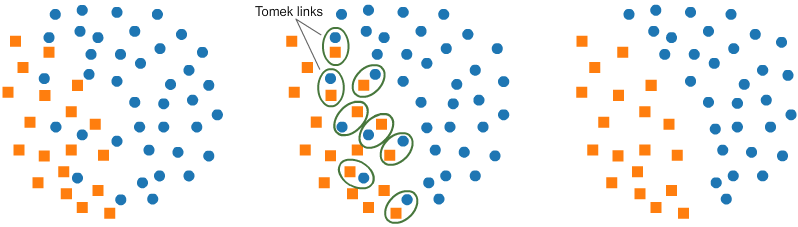

In [63]:
tl = SMOTETomek(random_state=139)
X_tl, y_tl = tl.fit_resample(X_train_pca, Y_train)

print(y_tl.value_counts())


1    16998
0    16998
Name: Failure_status, dtype: int64


Below we can visualize how some of the elements have been removed in the figure on the right.

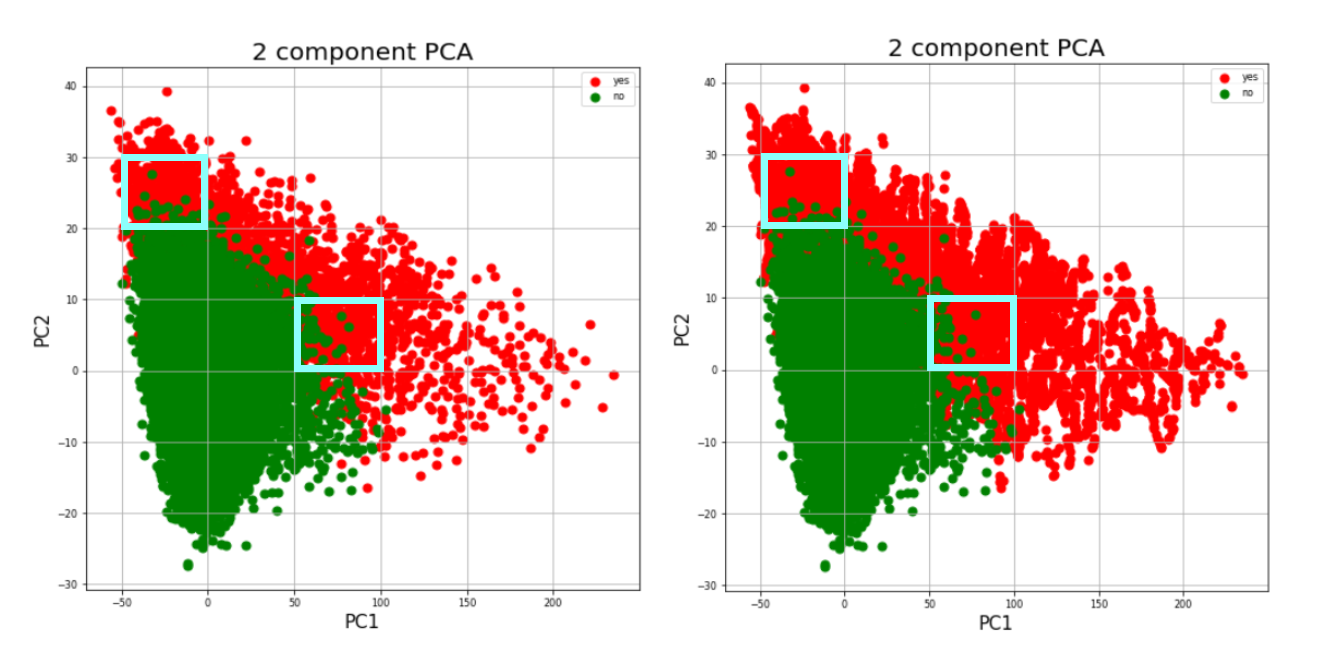

## ADASYN


This method was presented in a IEEE paper here: 
https://ieeexplore.ieee.org/document/4633969.

This is an oversampling algorithm that generates synthetic data. It uses a weighted distribution for different minority class entries, generating new ones according to their level of learning difficulty.

In [26]:
ada = ADASYN(random_state=130)
X_ada, y_ada = ada.fit_resample(X_train_pca, Y_train)

print(y_ada.value_counts())

0    17669
1    17531
Name: Failure_status, dtype: int64


# Classifiers

We are going to test 3 different classifiers:
* SVC
* RF
* MLP

With the 5 methods:
* Original
* Undersampled
* Oversampled
* Smote+TomekLinks
* ADASYN

To obtain 2 different types of results:
* f1_score
* roc_score

---

**Process:**

This process is done with every classifier with all methods:
* First we find the best parameters for the data we are using. We give several options to the grid search with 5 fold cross validation and find the best ones
     * Because this process takes a lot of time, it has been left as a comment. We ran it, saved the value and are creating the classifiers with the given results
     * In order to enable GridSearchCV for the best hyperparameters, just uncomment the code in red (between '''code''') and comment the code in the box right under 
* Then, we apply those parameters to SVC,RF and MLP Classifiers and fit the data
* With this, we predict the outcomes and create a confusion matrix
* Now we do the scores, f1 and ROC AUC, using the predicted values and the test data

In [27]:
# Saving All Results
f1_results = {k:{m:[] for m in ['Original', 'Undersampled','Oversampled', 'Smote+TomekLinks', 'ADASYN']} for k in   ['SVC','RF','MLP']}
roc_results = {k:{m:0 for m in ['Original', 'Undersampled','Oversampled', 'Smote+TomekLinks', 'ADASYN']} for k in ['SVC','RF','MLP'] }

## SVC
**Suport Vector Classifier**

In [28]:
# Defining the Grid Search Cross Validation
param_grid = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}
#Results Array to append to dataframe
results_f1 = []
results_ROC = []

### Original Data

In [29]:
# Fitting the model for grid search
'''
grid = GridSearchCV(SVC(), param_grid, scoring = 'roc_auc', cv=5)
t  =time.time()
grid.fit(X_train_pca, Y_train)
svc_best_estimator = grid.best_estimator_
print(f"Running time {time.time()-t}s")
svc_best_estimator
'''
# Results:
# Running time 958.7411775588989s
# SVC(C=100, gamma=0.001)

'\ngrid = GridSearchCV(SVC(), param_grid, scoring = \'roc_auc\', cv=5)\nt  =time.time()\ngrid.fit(X_train_pca, Y_train)\nsvc_best_estimator = grid.best_estimator_\nprint(f"Running time {time.time()-t}s")\nsvc_best_estimator\n'

In [31]:
svc_best_estimator = SVC(C=100, gamma=0.001)
svc_best_estimator.fit(X_train_pca, Y_train)

SVC(C=100, gamma=0.001)

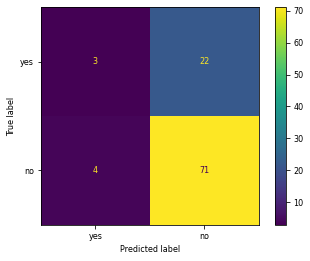

F1 Score:0.1875
ROC AUC Score:0.5333333333333333


In [32]:
pred_labels = svc_best_estimator.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_labels,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_labels)
f1_results ['SVC']['Original'] = f1_res
roc_results['SVC']['Original'] = roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

### Undersampled Data

In [349]:
# Fitting the model for grid search
'''
grid = GridSearchCV(SVC(), param_grid, scoring = 'roc_auc', cv=5)
t = time.time()
grid.fit(X_train_u, Y_train_u)
svc_best_estimator_us = grid.best_estimator_

print(f"Running time {time.time()-t}s")
svc_best_estimator_us
'''
# Results:
# Running time 117.49140977859497s
# SVC(C=1, gamma=0.01)

'\ngrid = GridSearchCV(SVC(), param_grid, scoring = \'roc_auc\', cv=5)\nt = time.time()\ngrid.fit(X_train_u, Y_train_u)\nsvc_best_estimator_us = grid.best_estimator_\n\nprint(f"Running time {time.time()-t}s")\nsvc_best_estimator_us\n'

In [350]:
svc_best_estimator_us = SVC(C=1, gamma=0.01)
svc_best_estimator_us.fit(X_train_u, Y_train_u)

SVC(C=1, gamma=0.01)

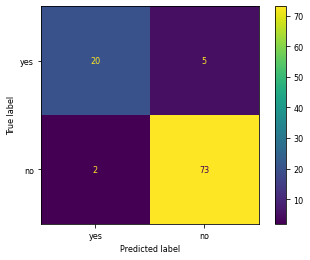

F1 Score:0.8510638297872342
ROC AUC Score:0.8866666666666668


In [351]:
pred_labels = svc_best_estimator_us.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_labels,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_labels)
f1_results['SVC']['Undersampled'] = f1_res
roc_results['SVC']['Undersampled'] = roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

### Oversampled Data

In [352]:
# Fitting the model for grid search
'''
grid = GridSearchCV(SVC(), param_grid, scoring = 'roc_auc', cv=5)
t = time.time()
grid.fit(X_train_o, Y_train_o)
svc_best_estimator_os = grid.best_estimator_

print(f"Running time {time.time()-t}s")
svc_best_estimator_os
'''
# Results:
# Running time 4105.043005466461s
# SVC(C=100, gamma=0.001)

'\ngrid = GridSearchCV(SVC(), param_grid, scoring = \'roc_auc\', cv=5)\nt = time.time()\ngrid.fit(X_train_o, Y_train_o)\nsvc_best_estimator_os = grid.best_estimator_\n\nprint(f"Running time {time.time()-t}s")\nsvc_best_estimator_os\n'

In [353]:
svc_best_estimator_os = SVC(C=100, gamma=0.001)
svc_best_estimator_os.fit(X_train_o, Y_train_o)

SVC(C=100, gamma=0.001)

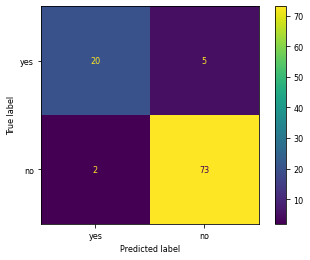

F1 Score:0.8510638297872342
ROC AUC Score:0.8866666666666668


In [354]:
pred_labels = svc_best_estimator_os.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_labels,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_labels)
f1_results['SVC']['Oversampled'] = f1_res
roc_results['SVC']['Oversampled'] = roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

### SMOTE + Tomek Links

In [355]:
# Fitting the model for grid search
'''
grid = GridSearchCV(SVC(), param_grid, scoring = 'roc_auc', cv=5)
t = time.time()
grid.fit(X_tl, y_tl)
svc_best_estimator_tl = grid.best_estimator_

print(f"Running time {time.time()-t}s")
svc_best_estimator_tl
'''
# Results
# Running time 3163.6839101314545s
# SVC(C=100, gamma=0.001)

'\ngrid = GridSearchCV(SVC(), param_grid, scoring = \'roc_auc\', cv=5)\nt = time.time()\ngrid.fit(X_tl, y_tl)\nsvc_best_estimator_tl = grid.best_estimator_\n\nprint(f"Running time {time.time()-t}s")\nsvc_best_estimator_tl\n'

In [272]:
svc_best_estimator_tl = SVC(C=100, gamma=0.001)
svc_best_estimator_tl.fit(X_tl, y_tl)

SVC(C=100, gamma=0.001)

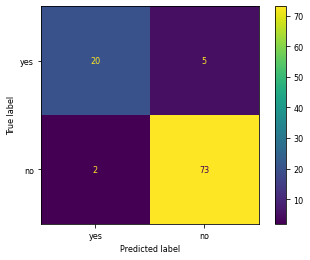

F1 Score:0.8510638297872342
ROC AUC Score:0.8866666666666668


In [356]:
pred_labels = svc_best_estimator_tl.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_labels,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_labels)
f1_results['SVC']['Smote+TomekLinks'] = f1_res
roc_results['SVC']['Smote+TomekLinks'] = roc_score
print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

### ADASYN

In [357]:
# Fitting the model for grid search
'''
grid = GridSearchCV(SVC(), param_grid, scoring = 'roc_auc', cv=5)
t = time.time()
grid.fit(X_ada, y_ada)
svc_best_estimator_ada = grid.best_estimator_

print(f"Running time {time.time()-t}s")
svc_best_estimator_ada
'''
# Results
# Running time 6310.764896869659s
# SVC(C=1000, gamma=0.0001)

'\ngrid = GridSearchCV(SVC(), param_grid, scoring = \'roc_auc\', cv=5)\nt = time.time()\ngrid.fit(X_ada, y_ada)\nsvc_best_estimator_ada = grid.best_estimator_\n\nprint(f"Running time {time.time()-t}s")\nsvc_best_estimator_ada\n'

In [358]:
svc_best_estimator_ada = SVC(C=1000, gamma=0.0001)
svc_best_estimator_ada.fit(X_ada, y_ada)

SVC(C=1000, gamma=0.0001)

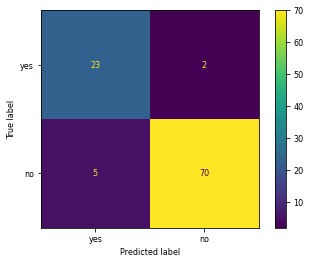

F1 Score:0.8679245283018867
ROC AUC Score:0.9266666666666667


In [359]:
pred_labels = svc_best_estimator_ada.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_labels,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_labels)
f1_results['SVC']['ADASYN'] = f1_res
roc_results['SVC']['ADASYN'] = roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

#### Final Results
ADASYN proved itself to be the best method to deal with data imbalance, the f1 score was maximum using this method as well as the ROC score.

In [360]:
names = ['Original', 'Undersampled','Oversampled', 'Smote+TomekLinks', 'ADASYN']
print("SVC Classifier F1 Score")
for i in range(5):
    print(f"{names[i]} -> {results_f1[i]}")

SVC Classifier F1 Score
Original -> 0.8095238095238095
Undersampled -> 0.8510638297872342
Oversampled -> 0.8510638297872342
Smote+TomekLinks -> 0.8510638297872342
ADASYN -> 0.8679245283018867


In [361]:
print("SVC Classifier ROC Score")
for i in range(5):
    print(f"{names[i]} -> {results_ROC[i]}")

SVC Classifier ROC Score
Original -> 0.84
Undersampled -> 0.8866666666666668
Oversampled -> 0.8866666666666668
Smote+TomekLinks -> 0.8866666666666668
ADASYN -> 0.9266666666666667


# Random Forest

Determining the best parameters for the grid search:

In [362]:
# Model Tuniing
rf_params = {"max_depth": [10,20,30],
            "max_features": ['auto','sqrt'],
            "n_estimators": [200,400,600],
            "min_samples_split": [2,5,10]}

#Arrays with score results for each method
results_f1 = []
results_ROC = []

### Original Data

In [363]:
# Fitting the model for grid search
'''
grid = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5, scoring = 'roc_auc')
t = time.time()
grid.fit(X_train_pca, Y_train)
print(f"Running time {time.time()-t}s")
rf_best_estimator = grid.best_estimator_
rf_best_estimator
'''
# Results
# Running time 1470.4402747154236s
# RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=10,n_estimators=400)

'\ngrid = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5, scoring = \'roc_auc\')\nt = time.time()\ngrid.fit(X_train_pca, Y_train)\nprint(f"Running time {time.time()-t}s")\nrf_best_estimator = grid.best_estimator_\nrf_best_estimator\n'

In [364]:
rf_best_estimator = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=10, n_estimators=400)
rf_best_estimator.fit(X_train_pca, Y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=10,
                       n_estimators=400)

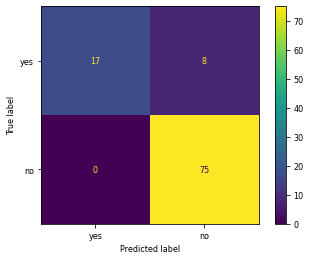

F1 Score:0.8095238095238095
ROC AUC Score:0.84


In [365]:
pred_label_rf = rf_best_estimator.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_label_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_label_rf,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_label_rf)
f1_results['RF']["Original"] = f1_res
roc_results['RF']['Original'] = roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

### Undersampled Data

In [366]:
# Fitting the model for grid search
'''
grid = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5, scoring = 'roc_auc')
t = time.time()
grid.fit(X_train_u, Y_train_u)
print(f"Running time {time.time()-t}s")
rf_best_estimator_us = grid.best_estimator_
rf_best_estimator_us
'''
# Results
# Running time 396.45836663246155s
# RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=10,n_estimators=600)

'\ngrid = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5, scoring = \'roc_auc\')\nt = time.time()\ngrid.fit(X_train_u, Y_train_u)\nprint(f"Running time {time.time()-t}s")\nrf_best_estimator_us = grid.best_estimator_\nrf_best_estimator_us\n'

In [367]:
rf_best_estimator_us = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=10,
                       n_estimators=600)
rf_best_estimator_us.fit(X_train_u, Y_train_u)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=10,
                       n_estimators=600)

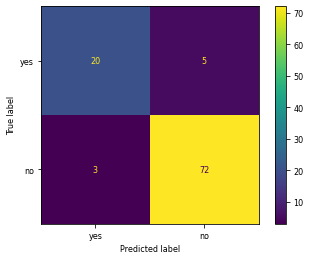

F1 Score:0.8333333333333333
ROC AUC Score:0.88


In [368]:
pred_labels_rf = rf_best_estimator_us.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_labels_rf,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_labels_rf)
f1_results['RF']['Undersampled']  = f1_res
roc_results['RF']['Undersampled']= roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

### Oversampled Data

In [369]:
# Fitting the model for grid search
'''
grid = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5, scoring = 'roc_auc')
t = time.time()
grid.fit(X_train_o, Y_train_o)
print(f"Running time {time.time()-t}s")
rf_best_estimator_os = grid.best_estimator_
rf_best_estimator_os
'''
# Results
# Running time 2254.9402987957s
# RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=10,n_estimators=600)

'\ngrid = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5, scoring = \'roc_auc\')\nt = time.time()\ngrid.fit(X_train_o, Y_train_o)\nprint(f"Running time {time.time()-t}s")\nrf_best_estimator_os = grid.best_estimator_\nrf_best_estimator_os\n'

In [311]:
rf_best_estimator_os = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=10,n_estimators=600)
rf_best_estimator_os.fit(X_train_o, Y_train_o)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=10,
                       n_estimators=600)

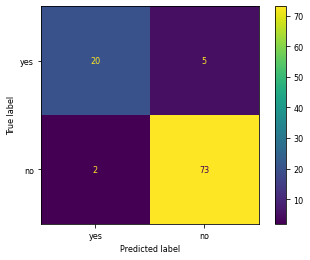

F1 Score:0.8510638297872342
ROC AUC Score:0.8866666666666668


In [370]:
pred_label_rf = rf_best_estimator_os.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_label_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_label_rf,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_label_rf)
f1_results['RF']['Oversampled'] = f1_res
roc_results['RF']['Oversampled'] = roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

### SMOTE + Tomek Links

In [371]:
# Fitting the model for grid search
'''
grid = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5, scoring = 'roc_auc')
t = time.time()
grid.fit(X_tl, y_tl)
print(f"Running time {time.time()-t}s")
rf_best_estimator_tl = grid.best_estimator_
rf_best_estimator_tl
'''
# Results
# Running time 2185.2518544197083s
# RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=600)

'\ngrid = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5, scoring = \'roc_auc\')\nt = time.time()\ngrid.fit(X_tl, y_tl)\nprint(f"Running time {time.time()-t}s")\nrf_best_estimator_tl = grid.best_estimator_\nrf_best_estimator_tl\n'

In [372]:
rf_best_estimator_tl = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=600)
rf_best_estimator_tl.fit(X_tl, y_tl)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=600)

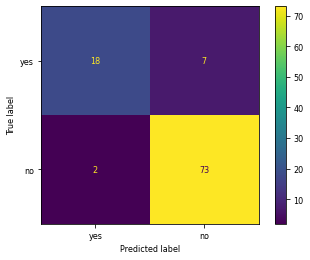

F1 Score:0.7999999999999999
ROC AUC Score:0.8466666666666667


In [373]:
pred_label_rf = rf_best_estimator_tl.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_label_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_label_rf,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_label_rf)
f1_results['RF']['Smote+TomekLinks'] = f1_res
roc_results['RF']['Smote+TomekLinks'] = roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

### ADASYN

In [374]:
# Fitting the model for grid search
'''
grid = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5, scoring = 'roc_auc')
t = time.time()
grid.fit(X_ada, y_ada)
print(f"Running time {time.time()-t}s")
rf_best_estimator_ada = grid.best_estimator_
rf_best_estimator_ada
'''
# Results
# Running time 2504.889993906021s
# RandomForestClassifier(max_depth=30, n_estimators=600)

'\ngrid = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5, scoring = \'roc_auc\')\nt = time.time()\ngrid.fit(X_ada, y_ada)\nprint(f"Running time {time.time()-t}s")\nrf_best_estimator_ada = grid.best_estimator_\nrf_best_estimator_ada\n'

In [375]:
rf_best_estimator_ada = RandomForestClassifier(max_depth=30, n_estimators=600)
rf_best_estimator_ada.fit(X_ada, y_ada)

RandomForestClassifier(max_depth=30, n_estimators=600)

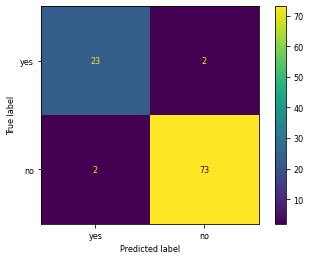

F1 Score:0.92
ROC AUC Score:0.9466666666666668


In [376]:
pred_label_rf = rf_best_estimator_ada.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_label_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_label_rf,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_label_rf)
f1_results['RF']['ADASYN'] = f1_res
roc_results['RF']['ADASYN'] = roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

#### Final Results
In this case, ADASYN is the winner in both F1 score and ROC score. Achieving a maximum 0.92 for F1 score and 0.947 for ROC score.

It is important to notice that, due to the fact that this classifier deals with randomness, the scores weren't always the same. However, ADASYN always provided the best result in every run.


In [377]:
names = ['Original', 'Undersampled','Oversampled', 'Smote+TomekLinks', 'ADASYN']
print("SVC Classifier F1 Score")
for i in range(5):
    print(f"{names[i]} -> {results_f1[i]}")

SVC Classifier F1 Score
Original -> 0.8095238095238095
Undersampled -> 0.8333333333333333
Oversampled -> 0.8510638297872342
Smote+TomekLinks -> 0.7999999999999999
ADASYN -> 0.92


In [378]:
print("SVC Classifier ROC Score")

for i in range(5):
    print(f"{names[i]} -> {results_ROC[i]}")

SVC Classifier ROC Score
Original -> 0.84
Undersampled -> 0.88
Oversampled -> 0.8866666666666668
Smote+TomekLinks -> 0.8466666666666667
ADASYN -> 0.9466666666666668


# MLP
**Multi-layer Perceptron**

Determining the best parameters for the grid search with the original data:

In [379]:
# mlp = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [3000],
}

#clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
#clf.fit(X_train_u, Y_train_u)

# Best parameter set
#print('Best parameters found:\n', clf.best_params_)

#Arrays with score results for each method
results_f1 = []
results_ROC = []

### Original Data

In [380]:
# Fitting the model for grid search
'''
grid = GridSearchCV(MLPClassifier(), param_grid, scoring = 'roc_auc', cv=5)
t = time.time()
grid.fit(X_train_pca, Y_train)
print(f"Running time {time.time()-t}s")
mlp_best_estimator = grid.best_estimator_
mlp_best_estimator
'''
# Results:
# Running time 2429.6921377182007s
# MLPClassifier(activation='tanh', hidden_layer_sizes=(300,))

'\ngrid = GridSearchCV(MLPClassifier(), param_grid, scoring = \'roc_auc\', cv=5)\nt = time.time()\ngrid.fit(X_train_pca, Y_train)\nprint(f"Running time {time.time()-t}s")\nmlp_best_estimator = grid.best_estimator_\nmlp_best_estimator\n'

In [381]:
mlp_best_estimator = MLPClassifier(activation='tanh', 
                                   hidden_layer_sizes=(300,))
mlp_best_estimator.fit(X_train_pca, Y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(300,))

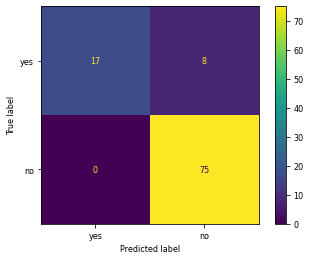

F1 Score:0.8095238095238095
ROC AUC Score:0.84


In [382]:
pred_labels_mlp = mlp_best_estimator.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels_mlp)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_labels_mlp,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_labels_mlp)
f1_results['MLP']['Original'] = f1_res
roc_results['MLP']['Original']= roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

### Undersampled Data

In [383]:
# Fitting the model for grid search
'''
grid = GridSearchCV(MLPClassifier(), param_grid, scoring = 'roc_auc', cv=5)
t = time.time()
grid.fit(X_train_u, Y_train_u)
print(f"Running time {time.time()-t}s")
mlp_best_estimator_us = grid.best_estimator_
mlp_best_estimator_us
'''
# Results:
# Running time 1080.8761518001556s
# MLPClassifier(activation='tanh', alpha=0.05, max_iter=3000)

'\ngrid = GridSearchCV(MLPClassifier(), param_grid, scoring = \'roc_auc\', cv=5)\nt = time.time()\ngrid.fit(X_train_u, Y_train_u)\nprint(f"Running time {time.time()-t}s")\nmlp_best_estimator_us = grid.best_estimator_\nmlp_best_estimator_us\n'

In [384]:
mlp_best_estimator_us = MLPClassifier(activation='tanh', 
                                      alpha=0.05, 
                                      max_iter=3000)
mlp_best_estimator_us.fit(X_train_u, Y_train_u)

MLPClassifier(activation='tanh', alpha=0.05, max_iter=3000)

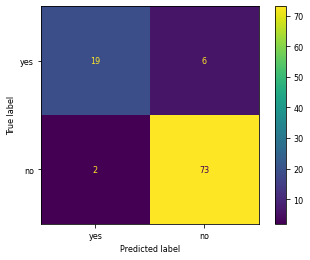

F1 Score:0.8260869565217391
ROC AUC Score:0.8666666666666667


In [385]:
pred_labels_mlp = mlp_best_estimator_us.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels_mlp)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_labels_mlp,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_labels_mlp)
f1_results['MLP']['Undersampled'] = f1_res
roc_results['MLP']['Undersampled'] = roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

### Oversampled Data

In [386]:
# Fitting the model for grid search
'''
grid = GridSearchCV(MLPClassifier(), param_grid, scoring = 'roc_auc', cv=5)
t = time.time()
grid.fit(X_train_o, Y_train_o)
print(f"Running time {time.time()-t}s")
mlp_best_estimator_os = grid.best_estimator_
mlp_best_estimator_os
'''
# Results:
# Running time 4440.240978002548s
# MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 50, 50),max_iter=3000, solver='sgd')

'\ngrid = GridSearchCV(MLPClassifier(), param_grid, scoring = \'roc_auc\', cv=5)\nt = time.time()\ngrid.fit(X_train_o, Y_train_o)\nprint(f"Running time {time.time()-t}s")\nmlp_best_estimator_os = grid.best_estimator_\nmlp_best_estimator_os\n'

In [387]:
mlp_best_estimator_os = MLPClassifier(activation='tanh', 
                                      alpha=0.05, 
                                      hidden_layer_sizes=(50, 50, 50),
                                      max_iter=3000, 
                                      solver='sgd')
mlp_best_estimator_os.fit(X_train_o, Y_train_o)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 50, 50),
              max_iter=3000, solver='sgd')

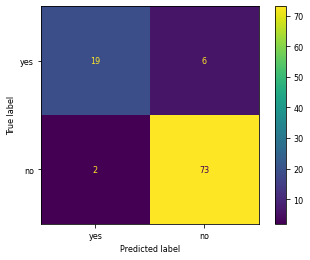

F1 Score:0.8260869565217391
ROC AUC Score:0.8666666666666667


In [388]:
pred_labels_mlp = mlp_best_estimator_os.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels_mlp)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_labels_mlp,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_labels_mlp)
f1_results['MLP']['Oversampled'] = f1_res
roc_results['MLP']['Oversampled'] = roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

### SMOTE + Tomek Links

In [389]:
# Fitting the model for grid search
'''
grid = GridSearchCV(MLPClassifier(), param_grid, scoring = 'roc_auc', cv=5)
t = time.time()
grid.fit(X_tl, y_tl)
print(f"Running time {time.time()-t}s")
mlp_best_estimator_tl = grid.best_estimator_
mlp_best_estimator_tl
'''
# Results
# Running time 4137.7049124240875s
# MLPClassifier(hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive', max_iter=3000)

'\ngrid = GridSearchCV(MLPClassifier(), param_grid, scoring = \'roc_auc\', cv=5)\nt = time.time()\ngrid.fit(X_tl, y_tl)\nprint(f"Running time {time.time()-t}s")\nmlp_best_estimator_tl = grid.best_estimator_\nmlp_best_estimator_tl\n'

In [390]:
mlp_best_estimator_tl = MLPClassifier(hidden_layer_sizes=(50, 100, 50), 
                                      learning_rate='adaptive',
                                      max_iter=3000)
mlp_best_estimator_tl.fit(X_tl, y_tl)

MLPClassifier(hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
              max_iter=3000)

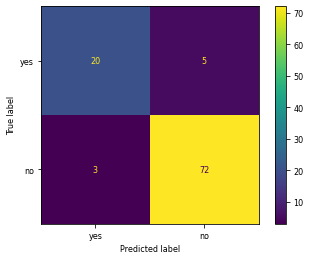

F1 Score:0.8333333333333333
ROC AUC Score:0.88


In [391]:
pred_labels_mlp = mlp_best_estimator_tl.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels_mlp)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_labels_mlp,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_labels_mlp)
f1_results['MLP']["Smote+TomekLinks"] = f1_res
roc_results['MLP']['Smote+TomekLinks'] = roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

### ADASYN

In [392]:
# Fitting the model for grid search
'''
grid = GridSearchCV(MLPClassifier(), param_grid, scoring = 'roc_auc', cv=5)
t = time.time()
grid.fit(X_ada, y_ada)
print(f"Running time {time.time()-t}s")
mlp_best_estimator_ada = grid.best_estimator_
mlp_best_estimator_ada
'''
# Results:
# Running time 7116.7388434410095s
# MLPClassifier(hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive', max_iter=3000, solver='sgd')

'\ngrid = GridSearchCV(MLPClassifier(), param_grid, scoring = \'roc_auc\', cv=5)\nt = time.time()\ngrid.fit(X_ada, y_ada)\nprint(f"Running time {time.time()-t}s")\nmlp_best_estimator_ada = grid.best_estimator_\nmlp_best_estimator_ada\n'

In [393]:
mlp_best_estimator_ada = MLPClassifier(hidden_layer_sizes=(50, 100, 50), 
                                       learning_rate='adaptive',
                                       max_iter=3000, 
                                       solver='sgd')
mlp_best_estimator_ada.fit(X_ada, y_ada)

MLPClassifier(hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
              max_iter=3000, solver='sgd')

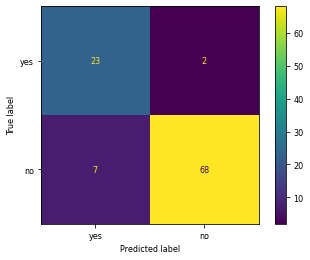

F1 Score:0.8363636363636363
ROC AUC Score:0.9133333333333334


In [394]:
pred_labels_mlp = mlp_best_estimator_ada.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels_mlp)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

f1_res = f1_score(Y_test,pred_labels_mlp,pos_label = 0)
roc_score = roc_auc_score(Y_test,pred_labels_mlp)
f1_results ['MLP']['ADASYN'] = f1_res
roc_results['MLP']['ADASYN'] = roc_score

print(f"F1 Score:{f1_res}")
print(f"ROC AUC Score:{roc_score}")

results_f1.append(f1_res)
results_ROC.append(roc_score)

#### Final Results
In this case, ADASYN is the winner in both F1 score and ROC score. Achieving a maximum 0.8363 for F1 score and 0.913 for ROC score.

In [395]:
names = ['Original', 'Undersampled','Oversampled', 'Smote+TomekLinks', 'ADASYN']
print("MLP Classifier F1 Score")
for i in range(5):
    print(f"{names[i]} -> {results_f1[i]}")

MLP Classifier F1 Score
Original -> 0.8095238095238095
Undersampled -> 0.8260869565217391
Oversampled -> 0.8260869565217391
Smote+TomekLinks -> 0.8333333333333333
ADASYN -> 0.8363636363636363


In [396]:
print("MLP Classifier ROC Score")
for i in range(5):
    print(f"{names[i]} -> {results_ROC[i]}")

MLP Classifier ROC Score
Original -> 0.84
Undersampled -> 0.8666666666666667
Oversampled -> 0.8666666666666667
Smote+TomekLinks -> 0.88
ADASYN -> 0.9133333333333334


# Results
* Plot the f1_results and the roc_results of the 3 classifiers and all the methods used.

In [460]:
df1 = pd.DataFrame( data = f1_results)
df1 = df1.rename(columns = {k: f"{k}_F1" for k in df1.columns})
droc = pd.DataFrame( data = roc_results)
droc = droc.rename(columns = {k: f"{k}_ROC" for k in droc.columns})
df = df1.join(droc)
df

,SVC_F1,RF_F1,MLP_F1,SVC_ROC,RF_ROC,MLP_ROC
Original,0.809524,0.809524,0.809524,0.840000,0.840000,0.840000
Undersampled,0.851064,0.833333,0.826087,0.886667,0.880000,0.866667
Oversampled,0.851064,0.851064,0.826087,0.886667,0.886667,0.866667
Smote+TomekLinks,0.851064,0.800000,0.833333,0.886667,0.846667,0.880000
ADASYN,0.867925,0.920000,0.836364,0.926667,0.946667,0.913333


In this table are presented all the results of each classifier for each method. The first 3 columns of the dataframe relate to the F1 score for each classifier whereas the last 3 relate to the ROC score.


In [461]:
df.loc['Original']

SVC_F1     0.809524
RF_F1      0.809524
MLP_F1     0.809524
SVC_ROC    0.840000
RF_ROC     0.840000
MLP_ROC    0.840000
Name: Original, dtype: float64

As can be seen, all classifiers produce the same F1 and ROC score for the original data.



### F1 Scores

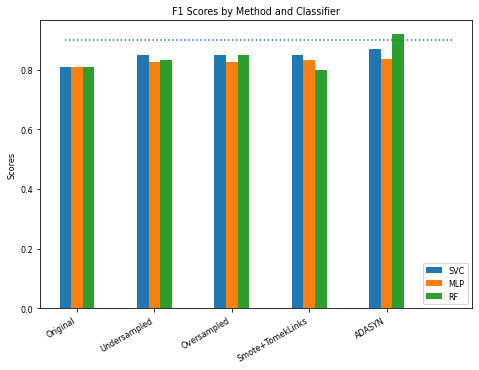

In [462]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

methods = ['Original', 'Undersampled','Oversampled', 'Smote+TomekLinks', 'ADASYN']

data = [[ x  for x in f1_results['SVC'].values()],
        [ x  for x in f1_results['MLP'].values()],
        [ x for x in f1_results['RF'].values()]]

ind = np.arange(5) 
width = 0.15
plt.bar(ind, data[0], width, label='SVC')
plt.bar(ind+width, data[1], width, label='MLP')
plt.bar(ind+2*width, data[2], width, label='RF')

plt.ylabel('Scores')
plt.title('F1 Scores by Method and Classifier')

plt.xticks(ind+width , methods)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.legend(loc='best')
plt.plot([0.9]*6, linestyle='dotted')

plt.show()

Note: The blue dotted line represents the 0.9 score mark

In [463]:
df1

,SVC_F1,RF_F1,MLP_F1
Original,0.809524,0.809524,0.809524
Undersampled,0.851064,0.833333,0.826087
Oversampled,0.851064,0.851064,0.826087
Smote+TomekLinks,0.851064,0.800000,0.833333
ADASYN,0.867925,0.920000,0.836364


In [464]:
res1 = df1.copy()
res1['Minimum Score'] =  df1.idxmin(axis=1)
res1['Maximum Score'] =  df1.idxmax(axis=1)
res1

,SVC_F1,RF_F1,MLP_F1,Minimum Score,Maximum Score
Original,0.809524,0.809524,0.809524,SVC_F1,SVC_F1
Undersampled,0.851064,0.833333,0.826087,MLP_F1,SVC_F1
Oversampled,0.851064,0.851064,0.826087,MLP_F1,SVC_F1
Smote+TomekLinks,0.851064,0.800000,0.833333,RF_F1,SVC_F1
ADASYN,0.867925,0.920000,0.836364,MLP_F1,RF_F1


#### Best Overall

In [483]:
max_val_col = res1['Maximum Score']
final_values = { (methods[i], max_val_col[i]):res1[max_val_col[i]].iloc[i] for i in range(5)}
best_result = sorted(final_values.items(), key = lambda item: item[1], reverse = True)[0]
print(f"Best F1 Score Result: {best_result[0][0]} with {best_result[0][1]}, Score: {best_result[1]}")

Best F1 Score Result: ADASYN with RF_F1, Score: 0.92


### ROC Results


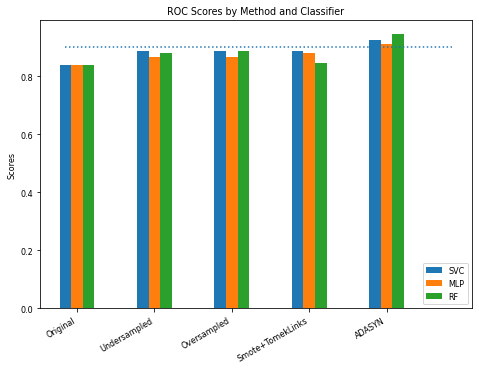

In [443]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

methods = ['Original', 'Undersampled','Oversampled', 'Smote+TomekLinks', 'ADASYN']

data = [[ x  for x in roc_results['SVC'].values()],
        [ x  for x in roc_results['MLP'].values()],
        [ x for x in roc_results['RF'].values()]]

ind = np.arange(5) 
width = 0.15
plt.bar(ind, data[0], width, label='SVC')
plt.bar(ind+width, data[1], width, label='MLP')
plt.bar(ind+2*width, data[2], width, label='RF')

plt.ylabel('Scores')
plt.title('ROC Scores by Method and Classifier')

plt.xticks(ind+width , methods)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.legend(loc='best')
plt.plot([0.9]*6, linestyle='dotted')

plt.show()

Note: The blue dotted line represents the 0.9 score mark

In [411]:
droc

,SVC_ROC,RF_ROC,MLP_ROC
Original,0.840000,0.840000,0.840000
Undersampled,0.886667,0.880000,0.866667
Oversampled,0.886667,0.886667,0.866667
Smote+TomekLinks,0.886667,0.846667,0.880000
ADASYN,0.926667,0.946667,0.913333


In [484]:
res2 = droc.copy()
res2['Minimum Score'] =  droc.idxmin(axis=1)
res2['Maximum Score'] =  droc.idxmax(axis=1)
res2

,SVC_ROC,RF_ROC,MLP_ROC,Minimum Score,Maximum Score
Original,0.840000,0.840000,0.840000,SVC_ROC,SVC_ROC
Undersampled,0.886667,0.880000,0.866667,MLP_ROC,SVC_ROC
Oversampled,0.886667,0.886667,0.866667,MLP_ROC,SVC_ROC
Smote+TomekLinks,0.886667,0.846667,0.880000,RF_ROC,SVC_ROC
ADASYN,0.926667,0.946667,0.913333,MLP_ROC,RF_ROC


#### Best and Worst Overall

In [491]:
max_val_col = res2['Maximum Score']
final_values = { (methods[i], max_val_col[i]):res2[max_val_col[i]].iloc[i] for i in range(5)}
best_result = sorted(final_values.items(), key = lambda item: item[1], reverse = True)[0]
print(f"Best ROC Score Result: {best_result[0][0]} with {best_result[0][1]}, Score: {best_result[1]}")

Best ROC Score Result: ADASYN with RF_ROC, Score: 0.9466666666666668


# Discussion

The best results for every Classifier are with the **ADASYN Method**, with **Random Forest** having the bests results both in terms of F1 Score and ROC. However, Random Forest is a classifier based on Random Decision Trees so it isn't as reliable as the other methodsm, nevertheless over multiple testing consistently provided top results.

SVC produces better results in some methods and RF in others, MLP is the worst classifier in all methods but its scores are always close to the others. 

Interestingly, testing with the Original Data produces the same or very similar results for all three classifiers.